## **Linear Regression**

This notebook is to demostrate the theories behind linear regression model using gradient descent.

Imagine a function:


$
f(x) = X^t\theta
$


Where X is a matrix (n x m) of n observations and m features, and $\theta$ the weights (including bias, imagine one of the element of feature is a constant of 1). **Note** that typically a linear function $f(x) = X\theta + \beta$ where $\theta$ is the slope and $\beta$ is intercept. In this case, for simplicity $x_0$ will always be 1 and we $\theta_0$ is the intercept. 


Now know X and y, the problem is to find the $\theta$ 


Let's generate some data below, for simplicity we assume we want to model with only 1 feature.

In [55]:
###import librarries
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

### - Generate random dataset with default size = 100 and intercept at around 5
### - Adding some noices around the line. 
### - Note the slope and intercept (As described above)
def generate_random_data(size = 100, intercept = 5, noise = True):
    X = 2 * np.random.rand(size, 1)
    y = 3 * X + intercept
    if noise:
      y = y + np.random.rand(size, 1) * intercept / 5
    return X, y

X, y = generate_random_data(size = 200, intercept = 10, noise = True)

In [46]:
### An alternative to generate dataset is using methods provided by sklearn
### https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html
from sklearn.datasets import make_regression

X, y, coef = make_regression(n_samples = 100, n_features = 1, n_targets = 1, bias  = 0.3, noise = 25, coef = True)
print(coef)

54.15679327726598


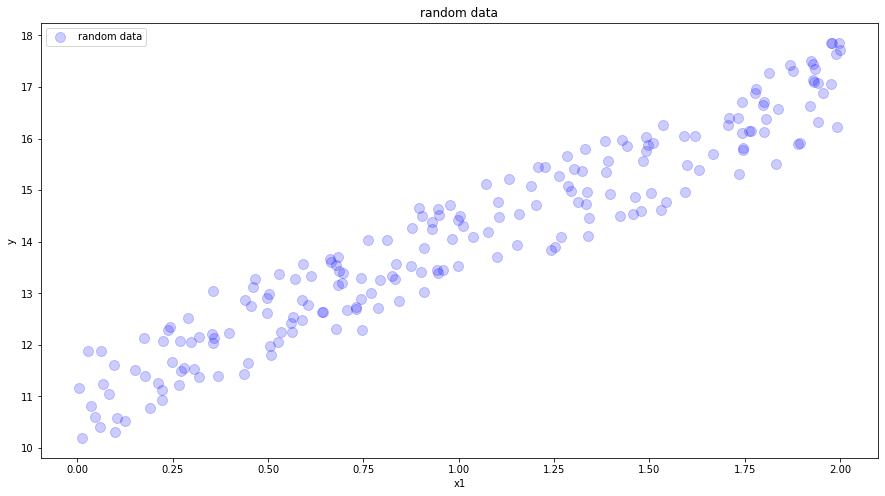

In [57]:
### Visualise random data generated 
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((15, 8))
ax.scatter(X, y, c = 'b', s = 100, alpha = 0.2, label="random data")
ax.set_title("random data")
plt.xlabel('x1')
plt.ylabel('y')
ax.legend()

#ax.spines['top'].set_color('none')
#ax.spines['left'].set_position('zero')
#ax.spines['right'].set_color('none')
#ax.spines['bottom'].set_position('zero')

#plt.xlim(-np.pi, np.pi)

plt.show()

### **Normal Equation**

One way to find  𝜃  is to use normal equation. https://www.geeksforgeeks.org/ml-normal-equation-in-linear-regression/
Which is shown below. 

However, the issue is that the caculation is quite computationally expensive $O(n^{2.3})$. 

It also **not able to handle intercepts** gracefully (see below when intercept is 10). It will work when intercept is through origin.

[[11.16278189]]


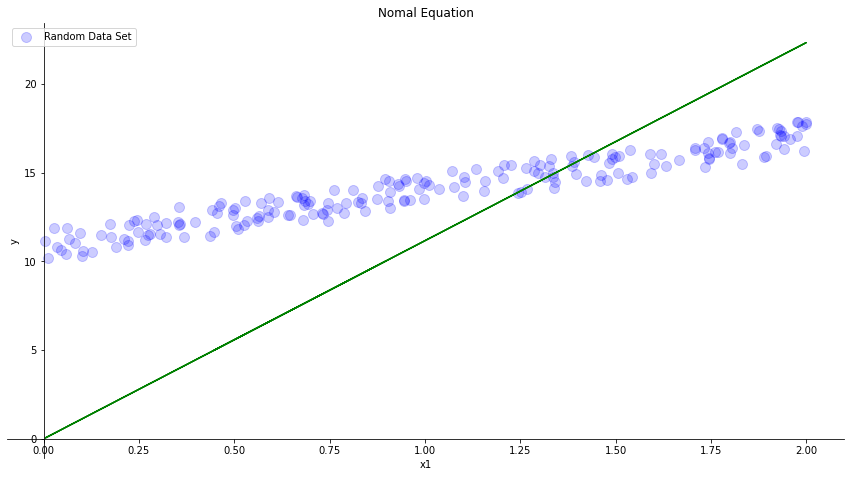

In [61]:
# normal equation
def normal_equation(X, y):
    return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

theta = normal_equation(X, y)
y_pred = X.dot(theta)
print(theta)


### Visualise regression line.
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((15, 8))
ax.scatter(X, y, c = 'b', s = 100, alpha = 0.2, label = "Random Data Set")
ax.plot(X, y_pred, c = 'g')
ax.set_title("Nomal Equation")

ax.spines['top'].set_color('none')
ax.spines['left'].set_position('zero')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')

#plt.xlim(-np.pi, np.pi)

plt.xlabel('x1')
plt.ylabel('y')
ax.legend()

### **Cost Function**

Another way to model the data is to use a linear function as an hypothesis function, initialised with random weights and bias. Then work towards minimise the difference (cost) between hypothesis and actual result. 

If we have:

$
h_\theta(x^{(i)}) = \theta_0 + \theta_1x_1^{(i)} + \theta_2x_2^{(i)} + ... + \theta_nx_n^{(i)}
$


We can define the cost function as the mean squated error (https://en.wikipedia.org/wiki/Mean_squared_error). $\hat{Y}$ is predicted value:

$
MSE = \frac{1}{m}\sum{i}^m(\hat{Y}_i - Y_i) ^ 2
$

The reason for the square is to ensure differences are non-negative, and also because it is a convex function, it will ensure gradient descent reaches minimal. For convenience, we will also add a 2 in the denvisor (dereivative of $x^2$ is $2x$):
 
$
C(h_\theta(x), y) = \frac{1}{2m}\sum{i}^m(h_\theta(x^i) - y)^2
$

The dervative of the cost function (running partial derivative for each of the x):

$
\frac{\delta}{\delta\theta}C(\theta) = \frac{2}{m}x^T\cdot(x\cdot\theta -y)
$

The best description by Andrew Ng is here: https://www.youtube.com/watch?v=F6GSRDoB-Cg&t=369s


In [62]:
# MSE cost function (root mean square error)
# typically used as error function for regression models
# the goal is to minimize the error function by finding tbe best
# thetas
def MSE(X, Theta, y):
    y_hat = X.dot(Theta)
    MSE = np.sum(np.square(y_hat - y))
    return MSE

# vectorised version of partial differential equation 
def d_MSE(X_b, theta, y):    
    return 2 / len(X) * X_b.T.dot(X_b.dot(theta) - y)

#theta = np.random.rand()

print(MSE(X, theta, y), d_MSE(X, theta, y))

6138.708994394819 [[-1.13331566e-14]]


 ### **Gradient Descent**
 
Consider if we start at a random point on the cost function curve (or surface). To find the minimal the best way is to find the gradient at the point and move downwards. This is done by defining a random weight of each of the feature, and deducting the weight by minus weight muliplied with a **learning rate**, until the gradient approaches 0 or a reasonable level.

The idea is to find the weight and bias. The bias can also be seen as a weight for feature $x_0$ and $x_0 = 1$

[[1.         0.89622371]
 [1.         0.10338623]] [[0.36598447]
 [0.79285455]]
Iteration 0: Cost = 33420.82582002094
Iteration 1000: Cost = 802.0640636209215
Iteration 2000: Cost = 452.15231176090197
Iteration 3000: Cost = 268.2942890615203
Iteration 4000: Cost = 170.4349751856426
Iteration 5000: Cost = 118.34870840442018
Iteration 6000: Cost = 90.62544853069727
Iteration 7000: Cost = 75.86956016468224
Iteration 8000: Cost = 68.01564102017797
Iteration 9000: Cost = 63.83534062765948
9999 iterations used


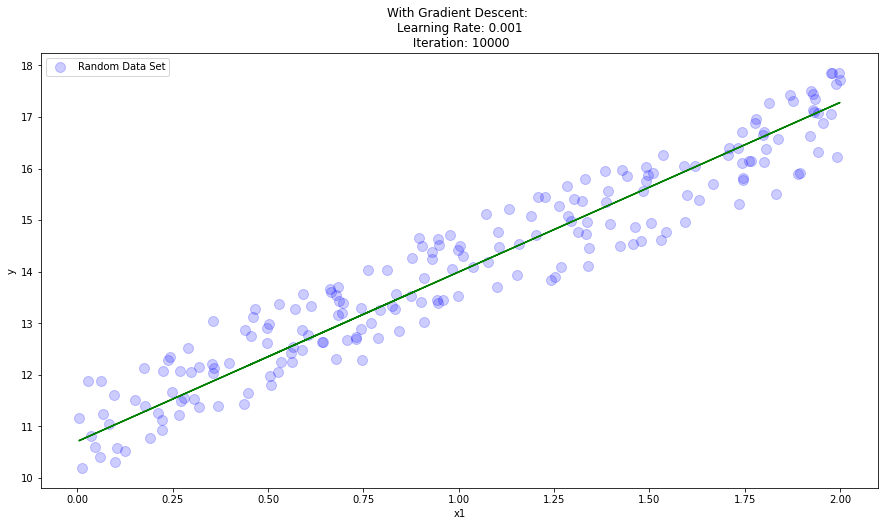

In [72]:
X_with_bias = np.c_[np.ones(len(X)), X]  # add 1 to X for intercept
theta = np.random.rand(2).reshape(2, -1) # initialise theta
print(X_with_bias[:2,], theta)

# Provide a learning rate, goes for number of iterations with an randomised
# theta. The hope is to find local minimal.
def gradient_descent(learn_rate, n_iter, X, theta, y):    
    theta0 = []
    theta1 = []
    cost = []
    for i in range(n_iter):                   
        gradients = d_MSE(X, theta, y)
        theta = theta - learn_rate * gradients
        cost = MSE(X, theta, y)
        if i % 1000 == 0:
            print(f"Iteration {i}: Cost = {cost}")
    print(f"{i} iterations used")
    return theta

# define learning rate and iterations
learning_rate = 0.001
iterations = 10000

# working out weights by using gradient descent
weights = gradient_descent(learning_rate, iterations, X_with_bias, theta, y)

#print(weights)

# calculate predition
y_pred = X * weights[1] + weights[0]

fig, ax = plt.subplots(1, 1)
fig.set_size_inches((15, 8))
ax.scatter(X, y, c = 'b', s = 100, alpha = 0.2, label = "Random Data Set")
ax.plot(X, y_pred, c = 'g')
ax.set_title(f"With Gradient Descent: \nLearning Rate: {learning_rate}\n Iteration: {iterations}")
plt.xlabel('x1')
plt.ylabel('y')
ax.legend()

## Sklearn linear regression

The same can also be done by using Scikit Learn.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

[10.9290826] [[3.10317946]] {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': 'deprecated', 'positive': False}


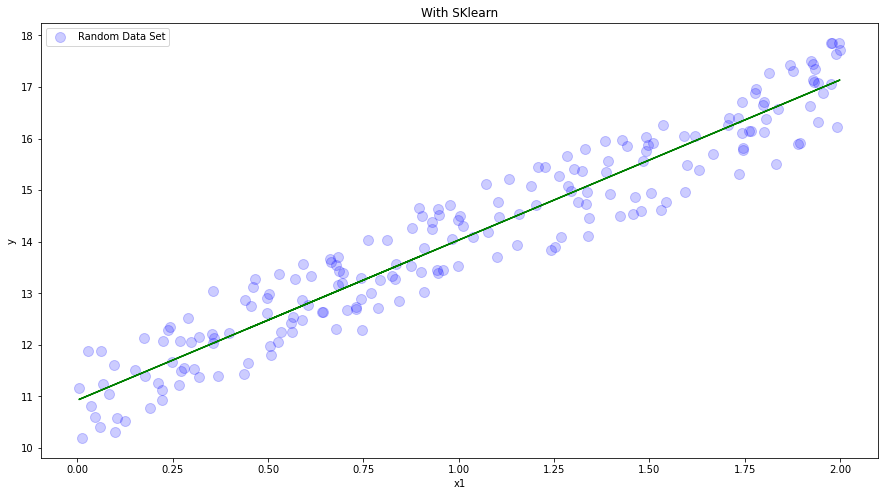

In [69]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

print(lin_reg.intercept_, lin_reg.coef_, lin_reg.get_params())

y_pred = lin_reg.predict(X)

fig, ax = plt.subplots(1, 1)
fig.set_size_inches((15, 8))
ax.scatter(X, y, c = 'b', s = 100, alpha = 0.2, label = "Random Data Set")
ax.plot(X, y_pred, c = 'g')
ax.set_title(f"With SKlearn")
plt.xlabel('x1')
plt.ylabel('y')
ax.legend()

## Learning Rate

Plot Training / Validation *MRSE* vs training set size 

In [78]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth = 2, label = 'train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth = 2, label = 'val')
    #return train_errors, val_errors
    

When training instances are 1 or 2 points, error will be 0, but generalise very poorly therefore high error, as training increases, the error in training will go up until it plateaus.The validation set may go done. However, due to the polynomial nature of the data, the error remains high. This indicate model is underfitting

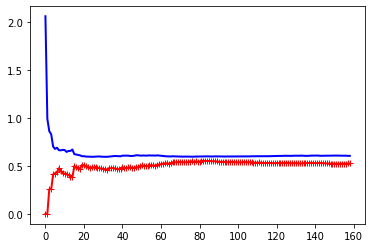

In [79]:
lin_reg = LinearRegression()
#X, y = generate_random_data()
plot_learning_curves(lin_reg, X, y)

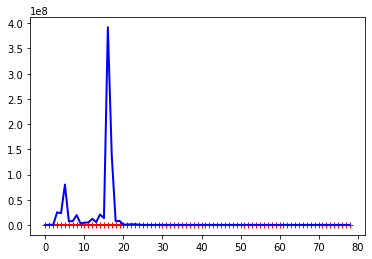

In [17]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
                            ('poly_features', PolynomialFeatures(degree = 20, include_bias=False)),
                            ('lin_reg', LinearRegression())
                        ])

plot_learning_curves(polynomial_regression, X, y)

## Bias / Variance / Irreducible Error

### Bias
This part of the generalisation error is due to wrong assumptions, such as assuming that data is linear when it is actually quandratic. A high-bias model is most like to underfit the training data.

### Variance
This part is due to the model's excessive sensitivity to small variations in the training data. A model with many degrees of freedom (such as a high-degree polynomial model) is likely to have high variance, and thus to overfit the training data. 

### Irreducible Error
This part is due to the noisiness of the data itself. The only way to reduce this part of the error is to clean up data.

Bias and Variance is always a trade off between model complexity (more complex less bias more variance.)

## Regularisation

### Ridge Regression
Ridge Regrssion (Tikhnov regularisation) is a regularised version of linear regression. Forces model not only fit but keep the weights as small as possible.

Sum of all weight^2 with a hyper parameter (alpha which controlls how much regularisation is applied. if 0 then typical linear regression).

#### Cost function
j(theta) = MSE(theta) + alpha * 1/2 * sum(theta^2)

sum(theta^2) = l2 norm


### Lasso Regrssion
Least absolute shrinkage and selection operator regression, using l1 norm instead of l2 norm

#### Cost function
j(theta) = MSE(theta) + alpha * sum(abs(theta))


### Elastic Net
j(theta) = MSE(theta) + r*alpha* sum(abs(theta)) + (1-r)/2 * alpha * sum(theta^2)

Note that ridge regression is a useful technique if as it automatically reduce features, however if there are features of importance it would be better to use Lasso or Elastic Net

## Early Stopping

Basically check when validation error is minimal and not decreasing anymore.

In [45]:
from sklearn.base import clone
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

poly_scaler = Pipeline([
    ("PolynomialFeatures", PolynomialFeatures(degree = 2, include_bias = True)),
    ("StandardScaler", StandardScaler())
])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)


sgd_reg = SGDRegressor(n_iter_no_change = 1, warm_start = True, penalty = None, learning_rate = "constant", eta0 = 0.0005)

min_val_error = float("inf")

best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train.ravel())
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_predict, y_val)
    if val_error < min_val_error:
        min_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)



In [46]:
print(best_epoch)
print(sgd_reg.coef_, sgd_reg.intercept_)

802
[0.         1.54304565 1.35021219] [3.59649334]


In [50]:
X_train[0]


array([-0.68582861])

In [49]:
X_train_poly_scaled[0]

array([ 0.        , -0.29084314, -0.78422066])